https://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf

In [1]:
from math import e, pi
from numpy import linspace, zeros_like, arange, convolve
from matplotlib import pyplot as plt
my_range = linspace(-5,5,num=100)

# 1. Definition

The numerator is the actual Gaussian function. The integral over numerator gives the denominator as the residual (and not unity). So to get 1, we divide numerator by denominator.
Hence denominator is also called as the normalisation constant.

In [2]:
def gaussianKernel(spatial_parameter, scale_parameter):
    numerator = e**(-(spatial_parameter**2/(2*scale_parameter**2)))
    normalisation_constant = ((2*pi)**(1/2)*scale_parameter)
    return numerator / normalisation_constant

Following diagram shows scaling factor is inversely proportional to the amplitude, rather the scaling factor decides the width of the kernel.

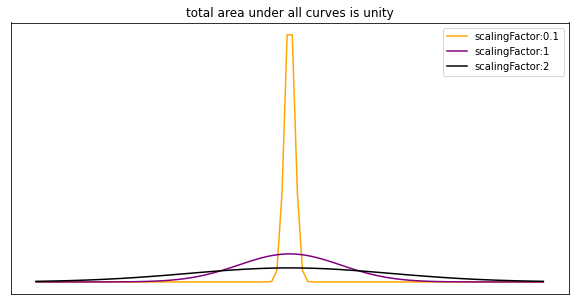

In [3]:
plt.figure(figsize=(10,5))
plt.plot(
    [gaussianKernel(spatial_parameter=x, scale_parameter=0.1) for x in my_range],
    color="orange",
    label="scalingFactor:0.1"
    )
plt.plot(
    [gaussianKernel(spatial_parameter=x, scale_parameter=1) for x in my_range],
    color="purple",
    label="scalingFactor:1"
    )
plt.plot(
    [gaussianKernel(spatial_parameter=x, scale_parameter=2) for x in my_range],
    color="black",
    label="scalingFactor:2"
    )
plt.legend(loc=0)
plt.title("total area under all curves is unity")
plt.xticks(ticks=[]); plt.yticks(ticks=[])
plt.show()

# 2. The Gaussian kernel is the physical equivalent of the mathematical point

Above we can observe that for scaling factor 0.1 the width of the kernel is very small. Assume we reduce the limit of scaling down to zero - what do you think would happen?

The resultant kernel would have an infinite amplitude, a zero width. This the kernel would be zero everywhere, except at that point. Area under this curve is still unity - which means mathematically we have now selected a point out of the whole set of points in our range. This function is called DiracDelta function. It is also called the sampling function.

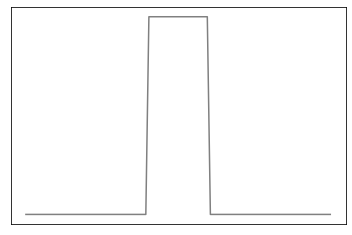

In [4]:
def diracDelta(spatial_parameters, scale_parameter):
    val = zeros_like(spatial_parameters)
    val[(-(1/(2*scale_parameter))<=spatial_parameters) & (spatial_parameters<=(1/(2*scale_parameter)))] = 1
    return val

plt.plot(diracDelta(my_range, 0.5), color="gray")
plt.xticks(ticks=[]); plt.yticks(ticks=[])
plt.show()

# 3. Central Limit theorm

Convolution with a Gaussian is a __linear__ operation.
One times a convolution of the above function with the same function gives a triangle function.


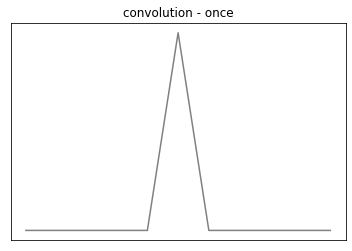

In [5]:
conv = convolve(diracDelta(my_range, 0.5), diracDelta(my_range, 0.5)) 
conv /= len(my_range) # Normalize
plt.plot(conv, color="gray")
plt.title("convolution - once")
plt.xticks(ticks=[]); plt.yticks(ticks=[])
plt.show()

Two times a convolution of the function with the same blockfunction gives a function that
rapidly begins to look like a Gaussian function.

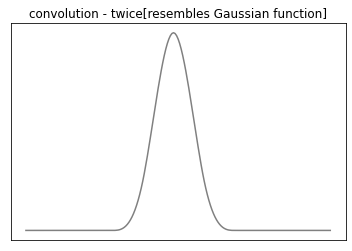

In [6]:
for _ in range(2):
    conv = convolve(conv[51:151], diracDelta(my_range, 0.5)) 
    conv /= len(my_range)
plt.title('convolution - twice[resembles Gaussian function]')
plt.plot(conv, color="gray")
plt.xticks(ticks=[]); plt.yticks(ticks=[])
plt.show()

The real Gaussian is reached when we apply an infinite number of these convolutions with the same function.
This result applies for the infinite repetition of "any" convolution kernel. This is the central
limit theorem. That is the centrality - no matter whichever (convolution) kernel you use after convolving it with itself (infinite times) all converge to the same Gaussian kernel, a central point.

# 4. Binomial coefficients

The Gaussian function emerges is in expansions of powers of polynomials. Expansion of (x + y)**20 is:

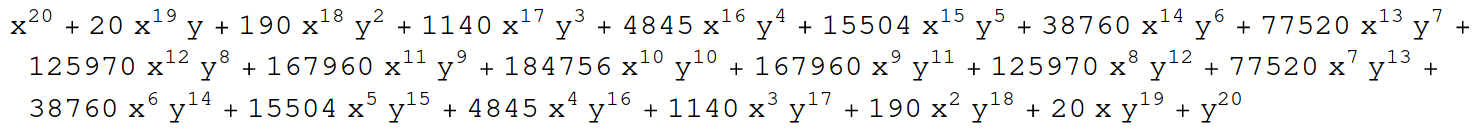

In [1]:
coefficients = [1,20,190,1140,4845,15504,38760,77520,125970,167960]
coefficients = coefficients + [184756] + coefficients[::-1]
plt.plot(coefficients, marker="*", color="orange", linestyle="--")
plt.xticks(ticks=[])
plt.show()

NameError: name 'plt' is not defined

# 5. Probability density function

Since area underneath the normal curve is always equal to 1, the Gaussian Kernel is the most common continuous probability function. Also because quite a many natural phenomenon display this behaviour. Its ubiquitous, hence the name normal distribution. 